In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.util

In [2]:


def add_speckle_noise(image, intensity):
    noise = np.random.randn(*image.shape) * intensity
    noisy_image = image + image * noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def geometric_mean_filter(image, kernel_size):
    padded = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REPLICATE)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sub_img = padded[i:i+kernel_size, j:j+kernel_size]
            product = np.prod(sub_img[sub_img > 0])
            filtered_image[i, j] = product**(1.0 / (kernel_size * kernel_size))
    return filtered_image.astype(np.uint8)

def add_salt_and_gaussian_noise(image, salt_prob, gauss_sigma):
    noisy_image = skimage.util.random_noise(image, mode='s&p', amount=salt_prob)
    noisy_image = skimage.util.random_noise(noisy_image, mode='gaussian', var=gauss_sigma**2)
    return (noisy_image * 255).astype(np.uint8)

def harmonic_mean_filter(image, kernel_size):
    padded = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REPLICATE)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sub_img = padded[i:i+kernel_size, j:j+kernel_size]
            filtered_image[i, j] = kernel_size**2 / np.sum(1.0 / (sub_img + 1e-5))
    return filtered_image.astype(np.uint8)

def add_salt_and_pepper_noise(image, salt_prob):
    noisy_image = skimage.util.random_noise(image, mode='s&p', amount=salt_prob)
    return (noisy_image * 255).astype(np.uint8)

def contra_harmonic_mean_filter(image, kernel_size, Q):
    padded = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REPLICATE)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sub_img = padded[i:i+kernel_size, j:j+kernel_size]
            num = np.sum(sub_img**(Q + 1))
            denom = np.sum(sub_img**Q + 1e-5)
            filtered_image[i, j] = num / denom if denom != 0 else 0
    return filtered_image.astype(np.uint8)



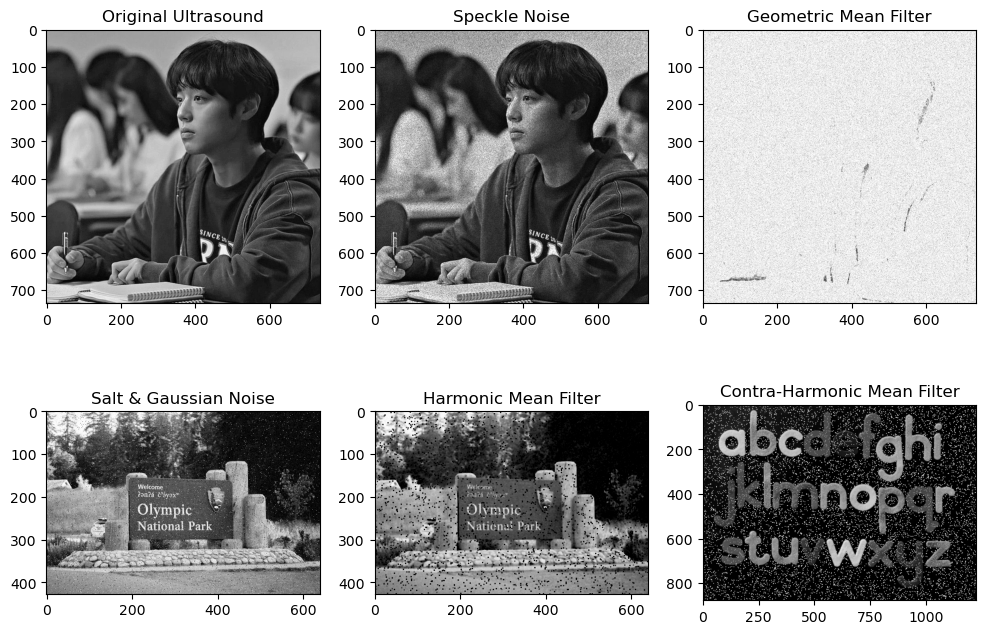

In [5]:
# Load ultrasound image
image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)
noisy_image_speckle = add_speckle_noise(image, 0.2)
filtered_geom_mean = geometric_mean_filter(noisy_image_speckle, 3)

# Load another image and add salt-and-Gaussian noise
image2 = cv2.imread("Program-1.jpg", cv2.IMREAD_GRAYSCALE)
noisy_image_gauss = add_salt_and_gaussian_noise(image2, 0.02, 0.05)
filtered_harm_mean = harmonic_mean_filter(noisy_image_gauss, 3)

# Load another image and add salt-and-pepper noise
image3 = cv2.imread("Program-2.jpg", cv2.IMREAD_GRAYSCALE)
noisy_image_sp = add_salt_and_pepper_noise(image3, 0.02)
filtered_contra_harm_mean = contra_harmonic_mean_filter(noisy_image_sp, 3, 1.5)

# Display Results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Ultrasound')
plt.subplot(2, 3, 2), plt.imshow(noisy_image_speckle, cmap='gray'), plt.title('Speckle Noise')
plt.subplot(2, 3, 3), plt.imshow(filtered_geom_mean, cmap='gray'), plt.title('Geometric Mean Filter')
plt.subplot(2, 3, 4), plt.imshow(noisy_image_gauss, cmap='gray'), plt.title('Salt & Gaussian Noise')
plt.subplot(2, 3, 5), plt.imshow(filtered_harm_mean, cmap='gray'), plt.title('Harmonic Mean Filter')
plt.subplot(2, 3, 6), plt.imshow(filtered_contra_harm_mean, cmap='gray'), plt.title('Contra-Harmonic Mean Filter')
plt.show()
